In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !rm -rf /content/images /content/labels /content/data.yaml

In [ ]:
# Распаковка датасета
!mkdir -p /content/RDD2022_yolo_split
!tar -xzf /content/drive/MyDrive/RoadGuardAI/rdd2022.tar.gz -C /content/RDD2022_yolo_split

In [24]:
!find /content/RDD2022_yolo_split -name "*.jpg" | wc -l # вывод кол-ва фото

30224


In [25]:
import torch
print(f"Доступность GPU: {torch.cuda.is_available()}")
print(f"GPU устройство: {torch.cuda.get_device_name(0)}")

Доступность GPU: True
GPU устройство: Tesla T4


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.9 MB/s eta 0:00:00


In [28]:
!ls -la /content/  # проверка наличия датасета
print()
!cat /content/RDD2022_yolo_split/data.yaml  # проверка конфига

total 5508
drwxr-xr-x 1 root root    4096 Dec  3 14:59 .
drwxr-xr-x 1 root root    4096 Dec  3 14:20 ..
drwxr-xr-x 4 root root    4096 Nov 20 14:30 .config
drwx------ 5 root root    4096 Dec  3 14:21 drive
drwxrwxrwx 5 root root    4096 Dec  3 14:34 RDD2022_yolo_split
drwxr-xr-x 1 root root    4096 Nov 20 14:30 sample_data
-rw-r--r-- 1 root root 5613764 Dec  3 14:59 yolo11n.pt

path: /content/RDD2022_yolo_split
train: images/train
val: images/val

nc: 4 # число классов
names: ["D00", "D10", "D20", "D40"]

In [29]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/RoadGuardAI/roadguard_models/v1/weights/last.pt')

results = model.train(
    data='/content/RDD2022_yolo_split/data.yaml',
    epochs=10,                    # 10 новых эпох
    imgsz=640,                    # размер изобр-я на входе (resize изображений любого размера до 640x640)
    batch=8,                      # сколько изобр-ий обрабатывать за раз
    device=0,                     # исп. только GPU
    rect=False,                   # не исп. rectangular training (для разнородных данных)
    verbose=True,                 # вывод эпох
    save=True,                    # сохраняет модель
    save_period=2,                # сохранять каждые 2 эпохи
    project='/content/drive/MyDrive/RoadGuardAI/roadguard_models',  # сохранять в Drive
    exist_ok=True,                # перезаписывать если существует
    name='v2'                     # имя эксперимента
)

print("Обучение завершено! Модели сохранены в Google Drive")

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/RDD2022_yolo_split/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/RoadGuardAI/roadguard_models/v1/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap


image 1/1 /content/sample_data/Czech_000006.jpg: 640x640 1 D00, 9.8ms
Speed: 6.8ms preprocess, 9.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


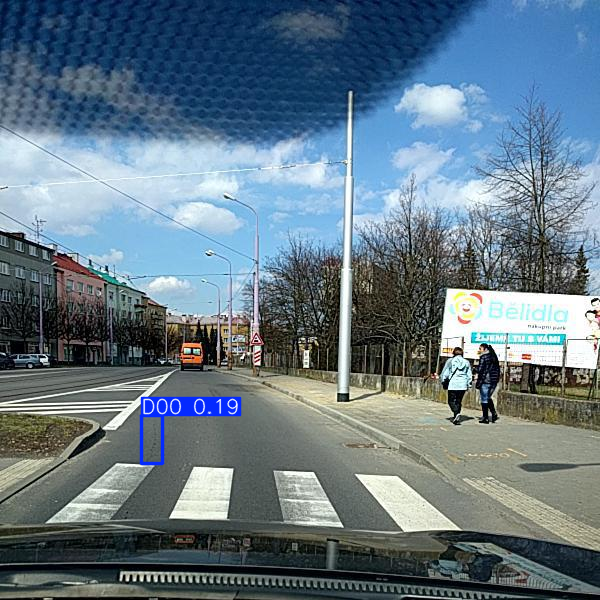

In [7]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/RoadGuardAI/roadguard_models/v2/weights/best.pt')
results = model.predict(
    'sample_data/Czech_000006.jpg',
    conf=0.1,
    iou=0.45
)
results[0].show()

Размер изображения: 600x600
Bbox: 141, 405, 166, 472


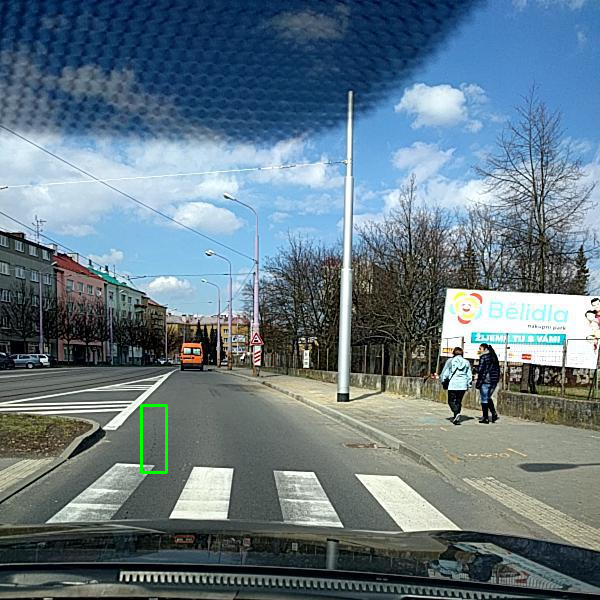

In [8]:
import cv2
from google.colab.patches import cv2_imshow  # Для Google Colab

img = cv2.imread('/content/sample_data/Czech_000006.jpg')
h, w = img.shape[:2]

# Координаты из аннотации
xmin, ymin, xmax, ymax = 141, 405, 166, 472
print(f"Размер изображения: {w}x{h}")
print(f"Bbox: {xmin}, {ymin}, {xmax}, {ymax}")

# Нарисуем bbox вручную
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Сохраняем и выводим
cv2.imwrite('debug.jpg', img)
cv2_imshow(img)  # Показываем изображение в Colab